Geometry plotting

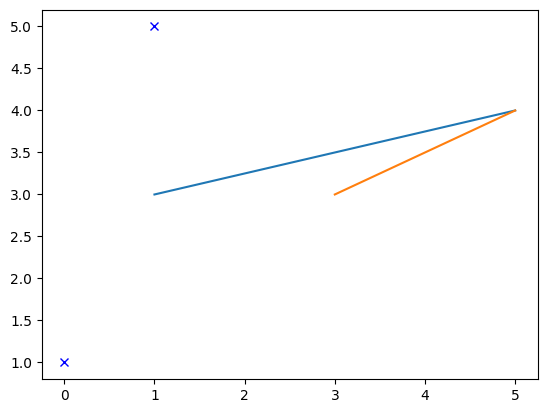

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 5], [3,4])
ax.plot([3, 5], [3,4])

ax.plot((1,5), "bx")


Point class

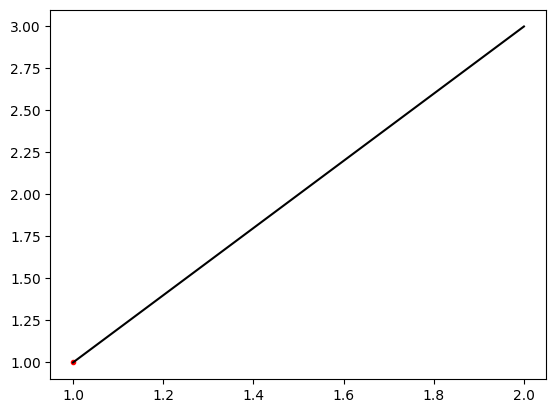

In [11]:
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
p1 = geo.Point(1,1)
p2 = geo.Point(2,3)

l=geo.Line(p1, p2)


fig, ax = plt.subplots()
p1.plot(ax, "r.")
l.plot(ax)


Polygon

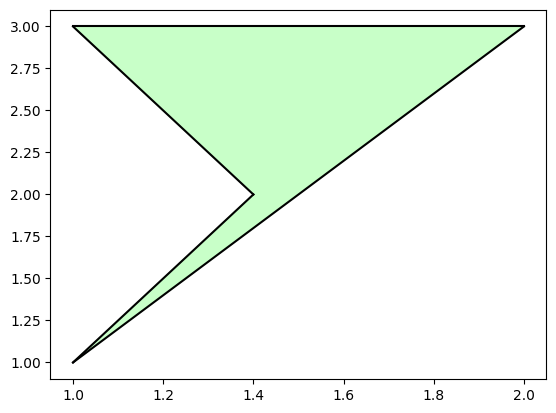

In [12]:
poly = geo.Polygon([geo.Point(1,1), geo.Point(2,3), geo.Point(1,3), geo.Point(1.4,2)])
fig, ax = plt.subplots()
poly.plot(ax)

Assembly

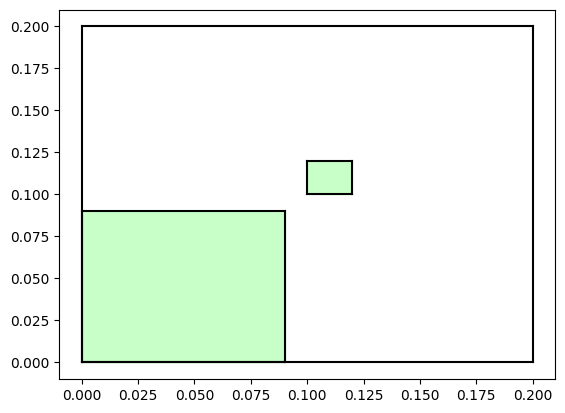

In [13]:
a = geo.Assembly(base_polygon=geo.Polygon([geo.Point(0,0),geo.Point(0.2,0),geo.Point(0.2,0.2), geo.Point(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Point(0.1,0.1),geo.Point(0.12,0.1),geo.Point(0.12,0.12), geo.Point(0.1,0.12)]), 
                               geo.Polygon([geo.Point(0,0),geo.Point(0.09,0),geo.Point(0.09,0.09), geo.Point(0,0.09)])])
fig,ax = plt.subplots()
a.plot(ax)

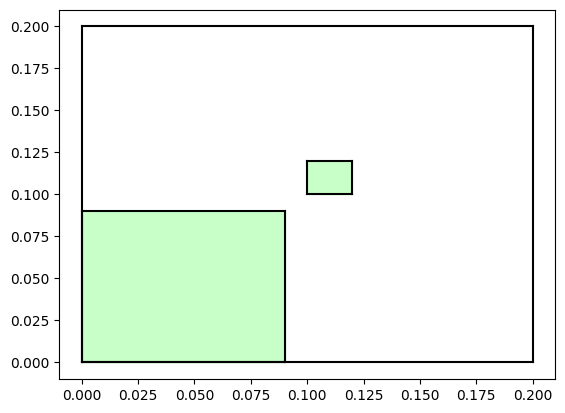

In [14]:
a.assemble()
fig, ax =plt.subplots()
a.plot(ax)






Elements sharing same lines

'Polygon_2'

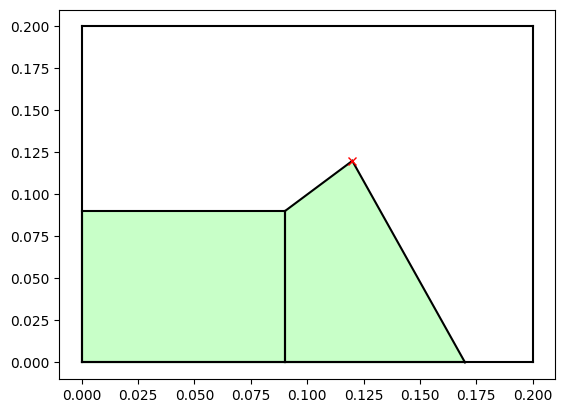

In [15]:
a = geo.Assembly(base_polygon=geo.Polygon([geo.Point(0,0),geo.Point(0.2,0),geo.Point(0.2,0.2), geo.Point(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Point(0,0),geo.Point(0.09,0),geo.Point(0.09,0.09), geo.Point(0,0.09)]),
                               geo.Polygon([geo.Point(0.09, 0), geo.Point(0.09,0.09),geo.Point(0.12,0.12), geo.Point(0.17,0)])])
a.assemble()
fig,ax = plt.subplots()
a.plot(ax)
point_to_find = geo.Point(0.12,0.119999)
display(a.getPolygon(point_to_find))
point_to_find.plot(ax, "rx")
plt.show()


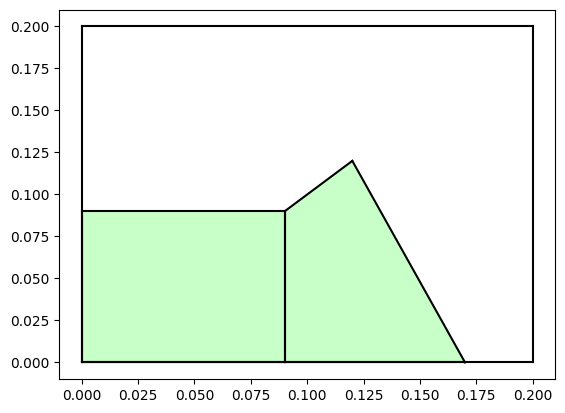

['Polygon_0', 'Polygon_1', 'Polygon_2']

In [16]:
import fluid_fvm.project as pr
a = geo.Assembly(base_polygon=geo.Polygon([geo.Point(0,0),geo.Point(0.2,0),geo.Point(0.2,0.2), geo.Point(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Point(0,0),geo.Point(0.09,0),geo.Point(0.09,0.09), geo.Point(0,0.09)]),
                               geo.Polygon([geo.Point(0.09, 0), geo.Point(0.09,0.09),geo.Point(0.12,0.12), geo.Point(0.17,0)])])
a.assemble()
fig,ax = plt.subplots()
a.plot(ax)
plt.show()

comp = pr.Component()

comp.setAssembly(a)
comp.assembly.getPolygonNames()

#ff11cc
[<fluid_fvm.project.Material object at 0x000001C10A161930>, <fluid_fvm.project.Material object at 0x000001C10A1322C0>]
{'Polygon_1': '#ffbbcc', 'Polygon_2': '#ff11cc'}


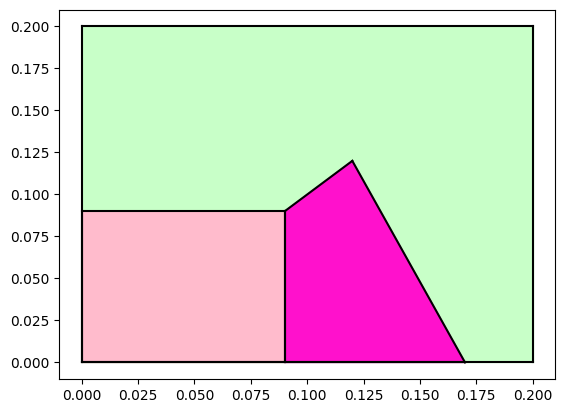

In [17]:
mat = pr.Material("test", lamb = 55, rho = 156, color = "#ffbbcc")
mat2 = pr.Material("test2", lamb = 556, rho = 1056, color = "#ff11cc")

print(mat2.getProperty("color"))
comp.assignMaterial("Polygon_1", mat)
comp.assignMaterial("Polygon_2", mat2)
print(comp.materials)
comp.material_connectivity

fig, ax = plt.subplots()
comp.plot(ax)

In [18]:
exdict = {"poly": "mat1", "poly2":"mat2"}

[e for e in exdict]

['poly', 'poly2']